In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

c:\Users\oveaz\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [3]:
df = pd.read_csv("loan_land_fraud.csv")
print("Dataset Loaded Successfully ✅")
print(df.head())

Dataset Loaded Successfully ✅
   loan_amount  loan_tenure_months    ltv  valuation_diff_pct  \
0      1792743                 101  90.93               -0.32   
1      4404572                  98  55.91               10.83   
2      2334489                 101  59.35                7.12   
3      1670006                  17  51.28              -21.38   
4      1236074                  81  69.99              -11.73   

   num_prev_mortgages  ownership_match_score  ocr_confidence  \
0                   3                   0.39            0.82   
1                   1                   0.71            0.65   
2                   0                   0.50            0.91   
3                   1                   0.46            0.92   
4                   0                   0.40            0.72   

   encumbrance_flag  credit_score  income  isFraud  
0                 0           758   45716        1  
1                 0           369   77175        0  
2                 0           684  

In [4]:
print("\n📊 Dataset Info:")
print(df.info())

print("\nFraud Distribution:\n", df["isFraud"].value_counts())
print("\nAvailable Columns:", df.columns.tolist())


📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   loan_amount            5000 non-null   int64  
 1   loan_tenure_months     5000 non-null   int64  
 2   ltv                    5000 non-null   float64
 3   valuation_diff_pct     5000 non-null   float64
 4   num_prev_mortgages     5000 non-null   int64  
 5   ownership_match_score  5000 non-null   float64
 6   ocr_confidence         5000 non-null   float64
 7   encumbrance_flag       5000 non-null   int64  
 8   credit_score           5000 non-null   int64  
 9   income                 5000 non-null   int64  
 10  isFraud                5000 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 429.8 KB
None

Fraud Distribution:
 isFraud
0    3222
1    1778
Name: count, dtype: int64

Available Columns: ['loan_amount', 'loan_tenure_months', 'ltv', 'v

In [5]:
print(df.columns.tolist())


['loan_amount', 'loan_tenure_months', 'ltv', 'valuation_diff_pct', 'num_prev_mortgages', 'ownership_match_score', 'ocr_confidence', 'encumbrance_flag', 'credit_score', 'income', 'isFraud']


In [6]:
features = [
    'loan_amount', 'loan_tenure_months', 'ltv', 'valuation_diff_pct', 'num_prev_mortgages', 'ownership_match_score', 'ocr_confidence', 'encumbrance_flag', 'credit_score', 'income'
]
X = df[features]
y = df["isFraud"]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [8]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [9]:
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train_s, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [10]:
y_pred = model.predict(X_test_s)


In [11]:
print("\n✅ Model Evaluation Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Model Evaluation Results:
Accuracy: 0.692

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.81      0.77       806
           1       0.58      0.48      0.52       444

    accuracy                           0.69      1250
   macro avg       0.66      0.64      0.65      1250
weighted avg       0.68      0.69      0.68      1250


Confusion Matrix:
 [[653 153]
 [232 212]]


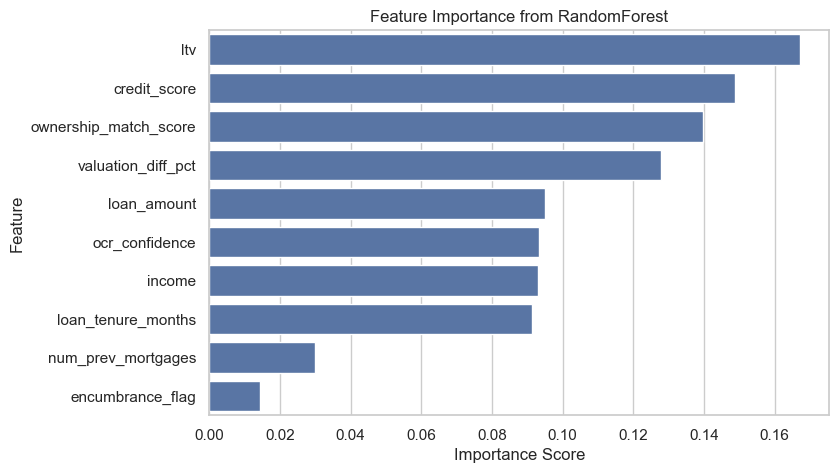

In [12]:
importances = model.feature_importances_
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importance from RandomForest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

In [13]:
print("\nGenerating SHAP Explainability...")

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_s, check_additivity=False)


Generating SHAP Explainability...


<Figure size 1000x600 with 0 Axes>

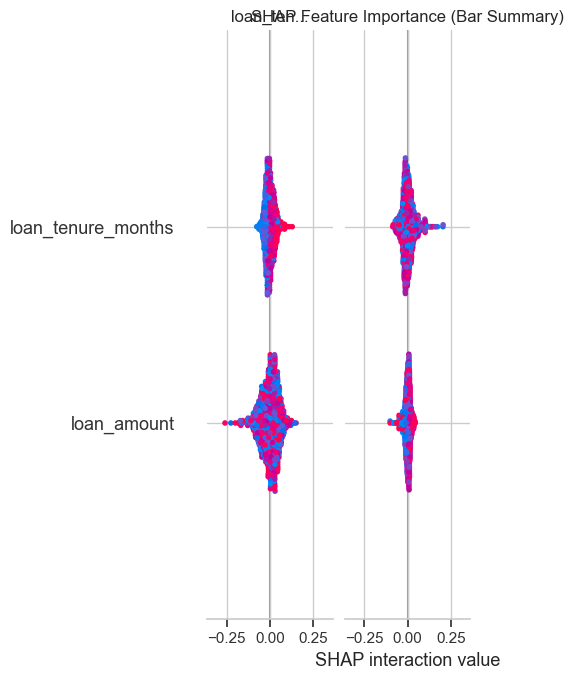

<Figure size 1000x600 with 0 Axes>

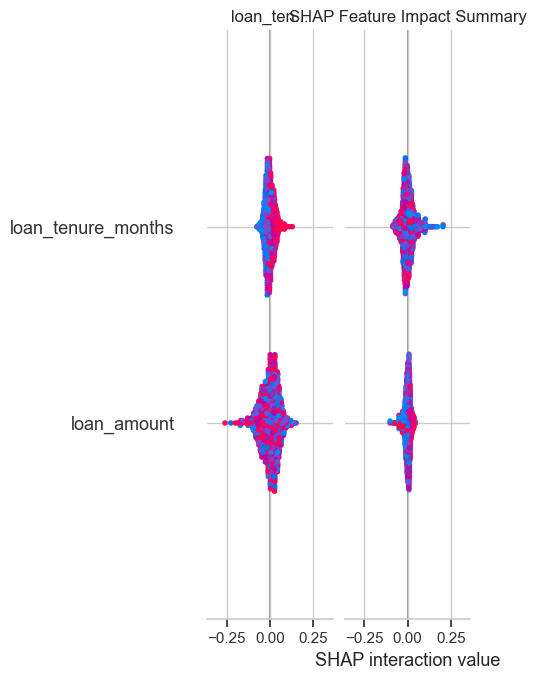


✅ SHAP Explainability Visuals Generated Successfully.


In [14]:
if isinstance(shap_values, list):
    shap_vals = shap_values[1]  # fraud class
else:
    shap_vals = shap_values

X_test_df = pd.DataFrame(X_test_s, columns=features)

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_vals, X_test_df, plot_type="bar", show=False)
plt.title("SHAP Feature Importance (Bar Summary)")
plt.show()

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_vals, X_test_df, show=False)
plt.title("SHAP Feature Impact Summary")
plt.show()

print("\n✅ SHAP Explainability Visuals Generated Successfully.")

In [17]:
import os
save_dir = os.getcwd()  # current working folder
model_path = os.path.join(save_dir, "fraud_detection_model.pkl")
scaler_path = os.path.join(save_dir, "scaler.pkl")

In [18]:
print("\n🧠 Model Type:", type(model))


🧠 Model Type: <class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [19]:
try:
    joblib.dump(model, model_path)
    print(f"✅ Model saved successfully at: {model_path}")
except Exception as e:
    print("❌ Error saving model:", e)

try:
    joblib.dump(scaler, scaler_path)
    print(f"✅ Scaler saved successfully at: {scaler_path}")
except Exception as e:
    print("❌ Error saving scaler:", e)

✅ Model saved successfully at: c:\Users\oveaz\OneDrive\Documents\FINAL-PRJ-2025\fraud_detection_model.pkl
✅ Scaler saved successfully at: c:\Users\oveaz\OneDrive\Documents\FINAL-PRJ-2025\scaler.pkl


In [20]:
print("\n📁 Files in current directory:")
print(os.listdir(save_dir))

print("\n🎯 Training complete. You can now build your Streamlit frontend!")


📁 Files in current directory:
['fraud_detection_model.pkl', 'loan_land_fraud.csv', 'model_training.ipynb', 'scaler.pkl', 'streamlit_app.py']

🎯 Training complete. You can now build your Streamlit frontend!
